# Assignment 2 - Supervised Machine Learning Fundamentals

## *YOUR FULL NAME HERE*
Netid: ejr41

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [49]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'


---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

#### 1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.

 The answer to this scenario is not straightforward because it relates to the function we can use that best approximates the true $f$ of our data. Even if we have a large dataset, if the true $f$ or behavior of that data is most reminiscent of a generalized linear model, then the linear model will perform better than a flexible one. On the other hand, typically, one assumes that, with an extremely large $n$, the data is spread in a manner that is probably not linear, so the true $f$ is might not be linear. In this case, because the dimensionality or $p$ is small, a flexible model is expected to perform better than an inflexible model. 

#### 2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

When the dimensionality of a dataset is large, the sample size tends to be reduced. In this scenario, more flexible models perform much worse than inflexible models due to the curse of dimensionality. Firstly, one runs the risk of extremely overfitting our model, hampering our out-of-sample performance. Secondly, when the data has too many features, the observations become difficult to cluster to the extent where every observation appears equally alike and equally different from the other. In this case, since clustering relies on distance measures to find similarity between observations, if all distances appear similar, then no meaningful clusters can be formed. Because of these reasons, the error rate increases for a flexible model under this hypothetical instance.

#### 3. The relationship between the predictors and response is highly non-linear.

If the true $f$ that bests approximates the data is non-linear, then a flexible model performs much better than an inflexible model. An inflexible model makes strong assumptions about the behavior and spread of the data as well as the parameters that can aid the prediction of said data. For this reason, with non-linear data, the inflexible and linear model will incur in a higher Mean Standard Error on the test data than its flexible counterpart because it assumed to much bias (too many consistent but incorrect predictions). On the other hand, a flexible model makes no such asssumptions and has the freedom to best represent the data and theoretically produce a lower error rate. 




#### 4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

When a model has extremely high variance, it is an instance in which a flexible model has overfit the data. It has become so complex in learning the specific patterns of the training data, and, as a result, it will generalize poorly to unseen data. In this sense, it will perform worse than an inflexible model. Another way to intuitively grasp what is ocurring is an example where a model needs more addition of more parameters and features to better understand the patterns in the data. At some point, one has so many parameters (even if the number of $p$ is less than $n$) that knowing which combination of those predicts the data becomes a conundrum. This phenomenon becomes akin to guessing which combination of button sequences produces a specific result. As a result, the way one data point is predicted varies drastically from one to the next. When it the model reaches unseen data, it will be expected to perform worse because it learned the nuances of the training data much too closely.


-Add answer of how variance is so high, model will just overfit. 

---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


#### **(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.




&nbsp;&nbsp;&nbsp; **i) Type of problem : Regression**

        This is a regression problem because there is want for estimating the relationship between a group of factors and the response variable "CEO salary", which is a continuous and numeric outcome, salary. 

&nbsp;&nbsp;&nbsp; **ii) Goal of problem : Inference**

        In the problem, we seek to understand the factors that affect CEO salary, as well as estimating the associations between the predictors and the response variable. However, the goal here is not prediction. We are not trying to predict salary from these factors. However, we do want to understand something akin to "For every increase in number of employees, the CEO salary appears to rise/fall by $X$ units", an example of the relationships themselves. 

&nbsp;&nbsp;&nbsp; **iii) Sample size $n$ and number of predictors $p$ : $n = 500$, $p = 3$**

        $n = 500$ : The firms are 500 in number.

        $p = 3$ :  The features meant to estimate a relationship with the CEO salary are profit, number of employees and the industry, three in total.


#### **(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.



&nbsp;&nbsp;&nbsp; **i) Type of problem : Classification**

        This is a classification problem because we want to estimate a discrete, binary outcome, "success" or "failure". 

&nbsp;&nbsp;&nbsp; **ii) Goal of problem : Prediction**

        In the problem, the company needs to be able to ascertain if its product launch will be a success or failure, where it is detailing a problem of predictive nature. It does not seek to understand the nature of the relationships between the predictors and the outcome variable, but it strongly needs to accurately know whethere its future product will be a success or failure given a set of features. In addition, this problem is a supervised learning problem because labeled data are being provided to train the model, and the new data will essentially be the company's assortment of features for their product. 

&nbsp;&nbsp;&nbsp; **iii) Sample size $n$ and number of predictors $p$ : $n = 20$, $p = 13$**

        $n = 20$ : The sample is composed of 20 products similar to the company's intended product.

        $p = 13$ :  The features for this predictive problem are the price charged for the product, the marketing budget, the competition price and ten additional variables, totalling in 13 features. 

#### **(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

&nbsp;&nbsp;&nbsp; **i) Type of problem : Regression**

        This is a regression problem because we want to estimate the % change in the US dollar, and that outcome is continous and numeric. 

&nbsp;&nbsp;&nbsp; **ii) Goal of problem : Prediction**

        In the problem, we want to predict the % change in the US dollar in relation to the weekly changes in the world stock markets. We do not specifically need to estimate the relationships between the features and the outcome, but we need strong predictive accuracy in order to estimate the % change of the US dollar. In addition, this problem is a supervised learning problem because data with the percent changes from 2012 (the labels) are provided to train the model, and the model will eventually be used to currently predict the % changes in the US dollar. 

&nbsp;&nbsp;&nbsp; **iii) Sample size $n$ and number of predictors $p$ : $n = 52$, $p = 3$**

        $n = 52$ : The sample is composed of 52 weeks in 2012 (obtained from a general google search).

        $p = 3$ :  The features for this predictive problem are the % change in the US market, the % change in the British market, and the % change in the German market, totalling in 13 features. 

---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [50]:
import numpy as np

X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y = np.array(["r", "r", "r", "b", "b", "r"])


**ANSWER**:

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

In [51]:
test_obs = np.zeros((X.shape))
assert test_obs.shape == X.shape


In [52]:
z = np.array([1, 2, 3])
w = np.array([[1, 2, 3], [7, 12, 10], [5, 2, 1]])
(w - z) ** 2


array([[  0,   0,   0],
       [ 36, 100,  49],
       [ 16,   0,   4]])

In [53]:
a_distance = np.sqrt(np.sum((test_obs - X) ** 2, axis=1))
# a_distance



| Obs. | $x_1$ | $x_2$ | $x_3$ | $Distance$|
|------|-------|-------|-------|-------|
| **1**|  0    |-3     | 0     | 3 |
| **2**|-2     | 0     | 0     | 2 |
| **3**| 0     | -1    | -3    | 3.162 |
| **4**| 0     | -1    | -2    | 2.236 |
| **5**| 1     | 0     | -1    | 1.414 |
| **6**|-1     | -1    | -1    | 1.732 |




**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?



In [54]:
# b_total_distance = np.sum(abs(a_distance), axis=1)

b_total_distance = np.sqrt(np.sum((test_obs - X) ** 2, axis=1))

lowest_distance_k1 = np.min(b_total_distance)

location_of_lowest_distance_k1 = np.where(b_total_distance == lowest_distance_k1)[0][0]

predicted_label = y[location_of_lowest_distance_k1]


print(
    f"With K=1, the prediction for our test point, [0,0,0], is {predicted_label} for 'blue'. The training data point with the lowest, euclidean distance from the test point is located at the index {location_of_lowest_distance_k1} of X.",
    "\n",
    f"I computed the sum of the differences of the features from the test point's features. The lowest, computed distance was {lowest_distance_k1:.3f}.",
)


With K=1, the prediction for our test point, [0,0,0], is b for 'blue'. The training data point with the lowest, euclidean distance from the test point is located at the index 4 of X. 
 I computed the sum of the differences of the features from the test point's features. The lowest, computed distance was 1.414.


**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?



In [55]:
# getting the 3 lowest distances less than or equal to the difference located at index 3 of lowest_distance_k3
# meaning three values located at indices [0,1,2] will be returned.

lowest_distance_k3 = np.partition(b_total_distance, 3)[:3]

indices_lowest_distances_k3 = []

lowest_distances_k3_labels = []

for val in lowest_distance_k3:

    index_found = np.where(b_total_distance == val)[0][0]

    if index_found in indices_lowest_distances_k3:

        second_count = 1

        while index_found in indices_lowest_distances_k3:
            index_found = np.where(b_total_distance == val)[0][second_count]
            second_count += 1

    indices_lowest_distances_k3.append(index_found)


for ind in indices_lowest_distances_k3:

    lowest_distances_k3_labels.append(y[ind])


dictionary_labels_k3 = {}

for label in lowest_distances_k3_labels:

    count = lowest_distances_k3_labels.count(label)

    dictionary_labels_k3[label] = count


prediction_label_k3 = max(dictionary_labels_k3, key=dictionary_labels_k3.get)

prediction_label_k3

print(
    f"With K=3, the prediction for our test point, [0,0,0], is {prediction_label_k3} for 'red'.",
    "\n",
    f"The smallest euclidean distances were {lowest_distance_k3}.",
    "\n",
    f"The indices of those distances associated with them are located at {indices_lowest_distances_k3} of X.",
    "\n",
    f"The labels of the three closest data points were {lowest_distances_k3_labels}. Due to majority vote, 'red' became the final assigned label.",
)


With K=3, the prediction for our test point, [0,0,0], is r for 'red'. 
 The smallest euclidean distances were [1.41421356 1.73205081 2.        ]. 
 The indices of those distances associated with them are located at [4, 5, 1] of X. 
 The labels of the three closest data points were ['b', 'r', 'r']. Due to majority vote, 'red' became the final assigned label.


**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

If K is small, the decision will be extremely flexible, indicating a large variance with low bias. If K is too large, high bias and low variance are introduced. For this problem, if the Bayes decision boundary is highly non-linear, we would expect the best value to a low enough K that will hopefully not incur in too much variance. The ideal K value should 3.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

In [56]:
# Skeleton code for part (a) to write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):

        pass
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        return
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**ANSWER**:

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

In [57]:
# Skeleton code for part (a) to write your own kNN classifier


class Knn:

    # k-Nearest Neighbor class object for classification training and testing

    def __init__(self):

        pass

    def fit(self, x, y):

        """Houses the training data"""

        # Save the training data to properties of this class

        self.train_x = x
        self.train_y = y

    def predict(self, x, k):

        """Generates the labels for the test data provided by using the training data"""

        y_hat = []  # Variable to store the estimated class label for

        # ensuring no one places k bigger than dimensionsa_distance

        assert k <= self.train_x.shape[0]

        test_x = x

        for arr in test_x:

            # Calculate the euclidean distance between a vector in test_x and all the training data

            difference_array = np.sqrt(
                np.sum((self.train_x - arr) ** 2, axis=1)
            )  # euclidean distance

            # partition phase : finding the smallest k differences

            lowest_distances_k = np.partition(difference_array, k)[:k]

            ind_low_dist = []  # for getting indices of lowest differences

            for val in lowest_distances_k:

                index_found = np.where(difference_array == val)[0][0]

                if index_found in ind_low_dist:

                    second_count = 1

                    while index_found in ind_low_dist:
                        index_found = np.where(difference_array == val)[0][second_count]
                        second_count += 1

                ind_low_dist.append(index_found)

            k_nearest_labels = self.train_y[ind_low_dist]

            labels, counts = np.unique(k_nearest_labels, return_counts=True)

            decision = np.where(counts == np.max(counts))[0][0]

            y_hat.append(labels[decision])

        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

In [58]:
A2_X_test_high = np.genfromtxt(
    "data/A2_X_test_high.csv", delimiter=",", dtype=float, encoding="UTF-8"
)
A2_y_test_high = np.genfromtxt(
    "data/A2_y_test_high.csv", delimiter=",", dtype=float, encoding="UTF-8"
)


A2_X_test_low = np.genfromtxt(
    "data/A2_X_test_low.csv", delimiter=",", dtype=float, encoding="UTF-8"
)
A2_y_test_low = np.genfromtxt(
    "data/A2_y_test_low.csv", delimiter=",", dtype=float, encoding="UTF-8"
)

A2_X_train_high = np.genfromtxt(
    "data/A2_X_train_high.csv", delimiter=",", dtype=float, encoding="UTF-8"
)
A2_y_train_high = np.genfromtxt(
    "data/A2_y_train_high.csv", delimiter=",", dtype=float, encoding="UTF-8"
)

A2_X_train_low = np.genfromtxt(
    "data/A2_X_train_low.csv", delimiter=",", dtype=float, encoding="UTF-8"
)
A2_y_train_low = np.genfromtxt(
    "data/A2_y_train_low.csv", delimiter=",", dtype=float, encoding="UTF-8"
)


**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

In [59]:
import time

# low dimensions

low_dim = Knn()

low_dim.fit(A2_X_train_low, A2_y_train_low)

t1_low = time.time()

low_dim_predictions = low_dim.predict(A2_X_test_low, 5)

t2_low = time.time()

low_dim_accuracy = accuracy(A2_y_test_low, low_dim_predictions)

print(
    f"The time required to make the predictions for the low dimensional dataset was {(t2_low-t1_low):.3f} seconds, and the overall accuracy was {low_dim_accuracy*100:.2f}%."
)


# low dimensions

high_dim = Knn()

high_dim.fit(A2_X_train_high, A2_y_train_high)

t1_high = time.time()

high_dim_predictions = high_dim.predict(A2_X_test_high, 5)

t2_high = time.time()

high_dim_accuracy = accuracy(A2_y_test_high, high_dim_predictions)

print(
    f"The time required to make the predictions for the high dimensional dataset was {(t2_high-t1_high):.3f} seconds, and the overall accuracy was {high_dim_accuracy*100:.2f}%."
)


The time required to make the predictions for the low dimensional dataset was 0.074 seconds, and the overall accuracy was 92.50%.
The time required to make the predictions for the high dimensional dataset was 0.145 seconds, and the overall accuracy was 99.30%.


**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# low dimensions


sk_knn_low = KNeighborsClassifier(n_neighbors=5)
sk_knn_low.fit(A2_X_train_low, A2_y_train_low)

sk_knn_t1_low = time.time()

sk_low_predict = sk_knn_low.predict(A2_X_test_low)

sk_knn_t2_low = time.time()


sk_low_metrics = metrics.accuracy_score(A2_y_test_low, sk_low_predict)

print("Low Dimensional Metrics :", "\n")

print(
    f"The time required for my implementation to make the predictions for the low dimensional dataset was {(t2_low-t1_low):.3f} seconds, and the overall accuracy was {low_dim_accuracy*100:.2f}%.",
    "\n",
)
print(
    f"The time required for sklearn's KNN to make the predictions for the low dimensional dataset was {(sk_knn_t2_low-sk_knn_t1_low):.3f} seconds, and the overall accuracy was {sk_low_metrics*100:.2f}%.",
    "\n",
)
print(
    f"For the low dimensional dataset, Sklearn's KNN classifier performed {(t2_low-t1_low)/(sk_knn_t2_low-sk_knn_t1_low):.3f} times faster than my implementation, and the accuracy difference between both models was {sk_low_metrics*100 - low_dim_accuracy*100:.2f}%.",
    "\n",
    "\n",
    "\n",
)


sk_knn_high = KNeighborsClassifier(n_neighbors=5)
sk_knn_high.fit(A2_X_train_high, A2_y_train_high)

sk_knn_t1_high = time.time()

sk_high_predict = sk_knn_high.predict(A2_X_test_high)

sk_knn_t2_high = time.time()


sk_high_metrics = metrics.accuracy_score(A2_y_test_high, sk_high_predict)

print("High Dimensional Metrics :", "\n")


print(
    f"The time required for my implementation to make the predictions for the high dimensional dataset was {(t2_high-t1_high):.3f} seconds, and the overall accuracy was {high_dim_accuracy*100:.2f}%.",
    "\n",
)
print(
    f"The time required for sklearn's KNN to make the predictions for the high dimensional dataset was {(sk_knn_t2_high-sk_knn_t1_high):.3f} seconds, and the overall accuracy was {sk_high_metrics*100:.2f}%.",
    "\n",
)
print(
    f"For the high dimensional dataset, Sklearn's KNN classifier performed {(t2_high-t1_high)/(sk_knn_t2_high-sk_knn_t1_high):.3f} times faster than my implementation, but the accuracy difference between both models is {sk_high_metrics*100 - high_dim_accuracy*100:.4f}%, effectively the same.",
    "\n",
    "\n",
    "\n",
)


Low Dimensional Metrics : 

The time required for my implementation to make the predictions for the low dimensional dataset was 0.074 seconds, and the overall accuracy was 92.50%. 

The time required for sklearn's KNN to make the predictions for the low dimensional dataset was 0.018 seconds, and the overall accuracy was 92.50%. 

For the low dimensional dataset, Sklearn's KNN classifier performed 4.101 times faster than my implementation, and the accuracy difference between both models was 0.00%. 
 
 

High Dimensional Metrics : 

The time required for my implementation to make the predictions for the high dimensional dataset was 0.145 seconds, and the overall accuracy was 99.30%. 

The time required for sklearn's KNN to make the predictions for the high dimensional dataset was 0.032 seconds, and the overall accuracy was 99.30%. 

For the high dimensional dataset, Sklearn's KNN classifier performed 4.470 times faster than my implementation, but the accuracy difference between both mode

The KNN classifier from SKLearn is considerably faster than my own implementation. However, just this once, I want to brag that I matched its accuracy. All things considered, if these models were to be scaled for larger data, my model would be a huge liability due to the performance penalties, contrasting with the KNN classifier from SKlearn that probably utilizes operations of a lower computational order (big O).


**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?



In [61]:
# import time

# # low dimensions

# np.random.rand(1000000,8)
# low_dim_50 = Knn()

# low_dim_50.fit(A2_X_train_low, A2_y_train_low)

# t1_low_50 = time.time()

# low_dim_50_predictions = low_dim_50.predict(A2_X_test_low, 50)

# t2_low_50 = time.time()

# low_dim_50_accuracy = accuracy(A2_y_test_low, low_dim_50_predictions)

# print(f"K = 50 : The time required to make the predictions for the low dimensional dataset was {(t2_low_50-t1_low_50):.3f} seconds, and the overall accuracy was {low_dim_50_accuracy*100:.2f}%. The performance penalty for adding more k is a {(t2_low_50-t1_low_50)/(t2_low-t1_low):.2f}X slowdown.")


# # low dimensions

# high_dim_50 = Knn()

# high_dim_50.fit(A2_X_train_high, A2_y_train_high)

# t1_high_50 = time.time()

# high_dim_50_predictions = high_dim_50.predict(A2_X_test_high, 50)

# t2_high_50 = time.time()

# high_dim_50_accuracy = accuracy(A2_y_test_high, high_dim_50_predictions)

# print(f"K = 50 :The time required to make the predictions for the high dimensional dataset was {(t2_high_50-t1_high_50):.3f} seconds, and the overall accuracy was {high_dim_50_accuracy*100:.2f}%. The performance penalty for adding more k is a {(t2_high_50-t1_high_50)/(t2_high-t1_high):.2f}X slowdown.")


In [62]:
import time

# low dimensions

q4_knn = Knn()
q4_dx = np.random.rand(100000, 10)
q4_dy = np.random.randint(2, size=(100000,))

q4_test_dx = np.random.rand(100000, 10)
q4_test_dy = np.random.randint(2, size=(100000,))

q4_knn.fit(q4_dx, q4_dy)

q4_t1 = time.time()

q4_pred = q4_knn.predict(q4_test_dx, 5)

q4_t2 = time.time()

q4_daccuracy = accuracy(q4_test_dy, q4_pred)

print(
    f"Synthetic Data : The time required to make the predictions for this dataset with 100K rows and 10 features totalled {(q4_t2-q4_t1)/60:.3f} minutes, and the overall accuracy was {q4_daccuracy*100:.2f}%."
)


Synthetic Data : The time required to make the predictions for this dataset with 100K rows and 10 features totalled 9.908 minutes, and the overall accuracy was 50.21%.


I printed an additional cell to simulate an environment where $n = 100,000$ rows, $p = 10$, and $k = 5$. The time required was 9.6 minutes on a CPU. I don't know if this can be optimized for a GPU; however, the time penalty to test for large data is huge, and it will only become worse as the data grows. As such, it is hard to imagine this model in certain, commercial contexts that are sensitive to time. In other words, if a job requires fast predictions for a large, test dataset by training another large dataset, this model might not be the right choice due to the performance penalties when $n$ and $k$ grow. On the other hand, in terms of research, such as identifying strains, where time may be less of a consideration, this model may be a good option. Even so, it is hard to imagine a KNN running for 4 days to classify strains as A or B. The amount of time in which it remains online and testing is a liability because it is susceptible to all sorts of interference and interruptions, such as power outages, hardware failures, and human error. 

In addition, the expense of the computation is another cause for concern. If a model has too many operations or the operations uses too much ram or storage, one's personal computer will not be enough. If the data size is a problem, one either needs more ram and/or storage. If the operations are not being run fast enough, one may need to run the job on a gpu. The options at that point are to use cloud resources or buy a gpu (graphics processing unit), and the difficulty escalated to, not only being computationally expensive, being financially expensive as well.

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

In [63]:
# from matplotlib.colors import LinearSegmentedColormap

# newcmp = LinearSegmentedColormap.from_list(
#     "new", [(r / 255, g / 255, b / 255), (r / 255, g / 255, b / 255)], N=2
# )


**ANSWER**

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.



In [64]:
from sklearn.datasets import make_moons

synthetic_x, synthetic_y = make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=None)

print(f"The synthetic dataset created with the make_moons module from sklearn has {len(synthetic_x)} rows for the features, which is one array, and {len(synthetic_y)} rows full of labels in another array.")

The synthetic dataset created with the make_moons module from sklearn has 1000 rows for the features, which is one array, and 1000 rows full of labels in another array.


**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

Question : plot one with both features # feature to feature, color by class

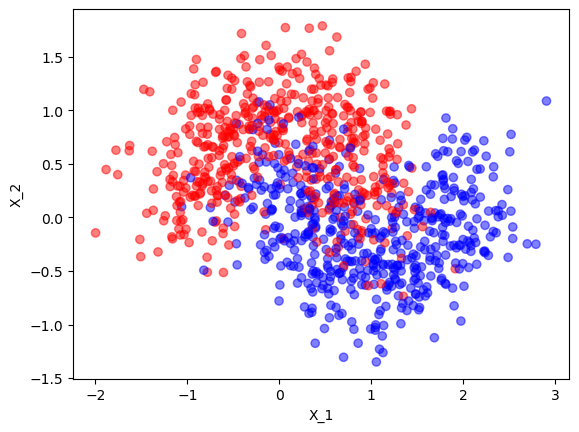

In [72]:
import matplotlib.pyplot as plt

# assign categories
categories = synthetic_y
synthetic_y_colors = np.array(['red' if i == 1 else 'blue' for i in synthetic_y]) # categories

# assign colormap
colormap = synthetic_y_colors


plt.xlabel('X_1')
plt.ylabel('X_2')

# depict illustration
plt.scatter(synthetic_x[:,0], synthetic_x[:,1], alpha = 0.5,c=colormap[categories])
plt.show()


**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

In [66]:
import random

sample_size = 100

subset_1, subset_2, subset_3 = [None,None], [None,None], [None,None]

for s in [subset_1, subset_2, subset_3]:

    subset_indices = random.choices([i for i in range(0,1000)], k = sample_size)

    # the x and the y

    s[0], s[1] =  synthetic_x[subset_indices].copy() , synthetic_y[subset_indices].copy()


In [67]:
# Subset 1 KNN

subset_1_knn_k1 = KNeighborsClassifier(n_neighbors=1)
subset_1_knn_k1.fit(subset_1[0], subset_1[1])

subset_1_knn_k25 = KNeighborsClassifier(n_neighbors=25)
subset_1_knn_k25.fit(subset_1[0], subset_1[1])


subset_1_knn_k50 = KNeighborsClassifier(n_neighbors=50)
subset_1_knn_k50.fit(subset_1[0], subset_1[1])

# Subset 2 KNN

subset_2_knn_k1 = KNeighborsClassifier(n_neighbors=1)
subset_2_knn_k1.fit(subset_2[0], subset_2[1])

subset_2_knn_k25 = KNeighborsClassifier(n_neighbors=25)
subset_2_knn_k25.fit(subset_2[0], subset_2[1])


subset_2_knn_k50 = KNeighborsClassifier(n_neighbors=50)
subset_2_knn_k50.fit(subset_2[0], subset_2[1])

# Subset 3 KNN

subset_3_knn_k1 = KNeighborsClassifier(n_neighbors=1)
subset_3_knn_k1.fit(subset_3[0], subset_3[1])

subset_3_knn_k25 = KNeighborsClassifier(n_neighbors=25)
subset_3_knn_k25.fit(subset_3[0], subset_3[1])


subset_3_knn_k50 = KNeighborsClassifier(n_neighbors=50)
subset_3_knn_k50.fit(subset_3[0], subset_3[1])

KNeighborsClassifier(n_neighbors=50)

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

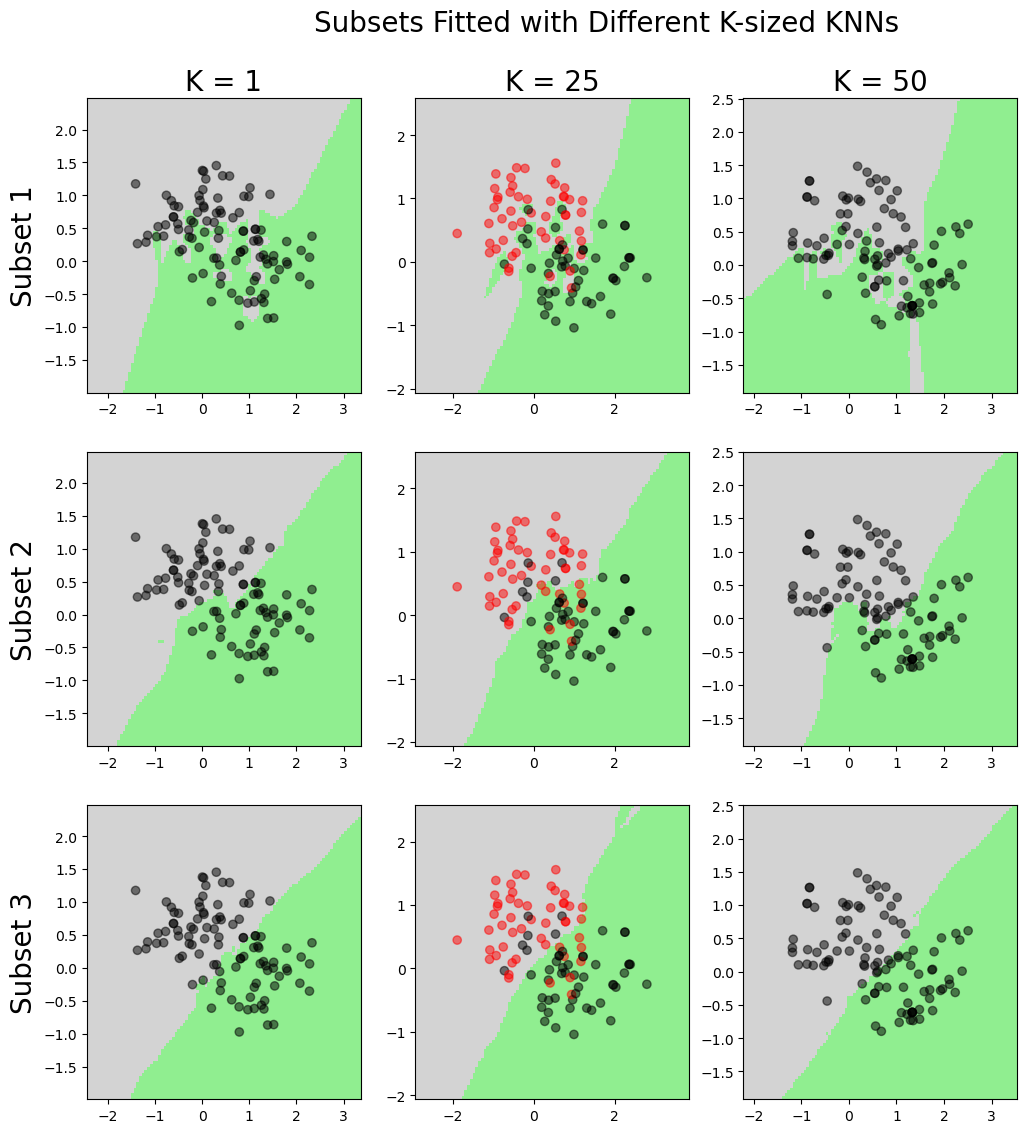

In [78]:

import seaborn as sns
from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

fig, axs = plt.subplots(3,3, figsize = (12,13))


axs[0, 0].set_title("K = 1",size = 20)
axs[0, 1].set_title("K = 25",size = 20)
axs[0, 2].set_title("K = 50",size = 20)

axs[0, 0].set_ylabel("Subset 1",size = 20)
axs[1, 0].set_ylabel("Subset 2",size = 20)
axs[2, 0].set_ylabel("Subset 3",size = 20)


plt.title("Subsets Fitted with Different K-sized KNNs", loc='center', x = -0.5, y = 3.6, size = 20)


subset_dictionary = [(0, [subset_1_knn_k1,subset_1_knn_k25,subset_1_knn_k50],subset_1),(1, [subset_2_knn_k1, subset_2_knn_k25, subset_2_knn_k50],subset_2), (2, [subset_3_knn_k1,subset_3_knn_k25,subset_3_knn_k50],subset_3)]


# Create color maps
cmap_light = ListedColormap(["lightgray", "lightgreen"])
cmap_bold = ["darkorange", "darkblue"]


for s in subset_dictionary:

    col = 0

    for model in s[1]:
        
        DecisionBoundaryDisplay.from_estimator(
        model,
        s[2][0],
        cmap=cmap_light,
        ax=axs[col,s[0]],
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto")

    # Plot also the training points
    
        # sns.scatterplot(
        #     x=X[:, 0],
        #     y=X[:, 1],
        #     hue=[0],
        #     palette=cmap_bold,
        #     alpha=1.0,
        #     edgecolor="black")
    
        categories = s[2][1]
        s_colors = np.array(['black' if i == 1 else 'red' for i in s[2][1]]) # categories

        # assign colormap
        colormap = s_colors

        # depict illustration
        axs[col,s[0]].scatter(s[2][0][:,0], s[2][0][:,1], alpha = 0.5,c=colormap[categories])

        col+=1




plt.show()

['black' 'black' 'black' 'red' 'black' 'black' 'red' 'black' 'red' 'black'
 'black' 'red' 'black' 'red' 'red' 'red' 'red' 'black' 'red' 'black' 'red'
 'black' 'black' 'red' 'black' 'black' 'red' 'red' 'black' 'black' 'black'
 'black' 'red' 'black' 'red' 'red' 'red' 'black' 'red' 'red' 'red' 'black'
 'red' 'black' 'black' 'red' 'red' 'black' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'black' 'black' 'red' 'black' 'black' 'black' 'red'
 'red' 'black' 'red' 'black' 'black' 'black' 'black' 'black' 'red' 'red'
 'black' 'black' 'red' 'black' 'red' 'red' 'red' 'black' 'red' 'red' 'red'
 'red' 'black' 'black' 'red' 'red' 'red' 'red' 'black' 'red' 'red' 'black'
 'red' 'black' 'red' 'black' 'black']


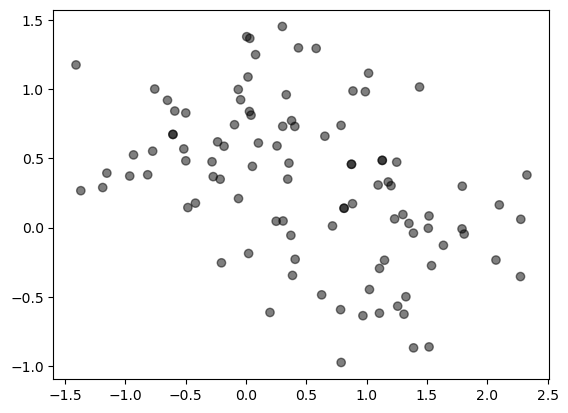

In [71]:
subset_1

categories = subset_1[1]
s_colors = np.array(['black' if i == 1 else 'red' for i in subset_1[1]]) # categories
print(s_colors)

# assign colormap
colormap = s_colors

# depict illustration
plt.scatter(subset_1[0][:,0], subset_1[0][:,1], alpha = 0.5,c=colormap[categories])

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

In [ ]:
# Subset 3 KNN

subset_3_knn_k1 = KNeighborsClassifier(n_neighbors=1)
subset_3_knn_k1.fit(subset_1[0], subset_1[1])

subset_3_knn_k25 = KNeighborsClassifier(n_neighbors=25)
subset_3_knn_k25.fit(subset_1[0], subset_1[1])


subset_3_knn_k50 = KNeighborsClassifier(n_neighbors=50)
subset_3_knn_k50.fit(subset_1[0], subset_1[1])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
subset_skknn_k1 = KNeighborsClassifier(n_neighbors=1)
subset_skknn_k1.fit(subset_1_x, subset_1_y)

subset_skknn_k25 = KNeighborsClassifier(n_neighbors=25)
subset_skknn_k25.fit(subset_1_x, subset_1_y)


subset_skknn_k50 = KNeighborsClassifier(n_neighbors=50)
subset_skknn_k50.fit(subset_1_x, subset_1_y)

sk_knn_low = KNeighborsClassifier(n_neighbors=5)
sk_knn_low.fit(A2_X_train_low, A2_y_train_low)

KNeighborsClassifier(n_neighbors=50)

Do I need three ys, three xs, then use a KNN method to plot
By rweplacement, can they repeat within same dataset or not? I understand no

Alt solution:



## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [ ]:
import numpy as np
import pandas as pd

path = "./data/"
train = pd.read_csv(path + "A2_Q7_train.csv")
test = pd.read_csv(path + "A2_Q7_test.csv")

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values


**ANSWER**